# Average hdf5 traces

<span style="color:red">IMPORTANT</span> - This notebook reads HDF5 files. Always PAUSE Sequencer.vi to run analysis for current sequence (HDF5 r/w conflict)!

### Configure Ipython

In [1]:
#import python packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator
import oskar

### Import

In [12]:
rid = '20160429_113914'
h5 = oskar.H5Data(rid)              # data
h5.load_log()
vDF = h5.var_df()
out_dire = h5.out_dire("Traces")    # output
h5.pprint()

20160429_113914
   Author:	 AA
   Description:  n = 10 low res lineshape


In [14]:
vDF[vDF.IR == 758.9336]

,DLY_EA,IR,VOL_u101,VOL_u104,WAV
SQUID,,,,,
2,6.350000e-07,758.9336,2200,2200,243.2
46,6.350000e-07,758.9336,2200,2200,243.2
67,6.350000e-07,758.9336,2200,2200,243.2


In [22]:
# data
ftype = 'CH_A0'
squid = [2, 46, 67]
trace, info = h5.load_array(squid, ftype)
print(np.shape(trace))
pprint.pprint(info)

(179L, 2858L)
{u'Manufacturer': 'Agilent',
 u'Model': 'DSO6104A,MY51510237,06.17.0001\n',
 u'dt': 3.5000000000000003e-09,
 u'input impedance': '50 ohms',
 u'name': 'Channel 1',
 u'probe attenuation': 1.0,
 u't0': 2.9999999999995308e-07,
 u'vertical coupling': 'DC',
 u'vertical offset': -0.035000000000000003,
 u'vertical range': 0.080000000000000002}


### Plot Traces

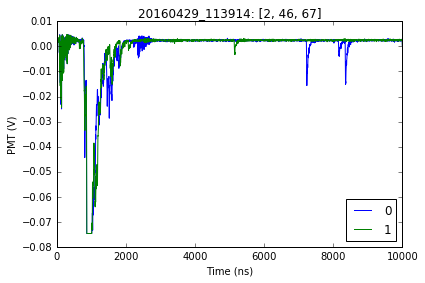

In [23]:
reps = [0, 1]
# xdata
scale = 1E-9 #convert to nano seconds
points = len(trace[0])
x = (np.arange(points)*info['dt'])/scale
# plot setup
fig, ax = plt.subplots()
for r in reps:
    ax.plot(x, trace[r], label=r)

# labels
tit = rid + ': ' + str(squid)
ax.set_title(tit)    
ax.set_xlabel('Time (ns)')  
ax.set_ylabel('PMT (V)')    

# format
ax.set_xlim([x.min(), x.max()])
plt.legend(loc=0)

#output
plt.tight_layout()
fileout = os.path.join(out_dire, str(reps) + "_"+ftype+".png")
#plt.savefig(fileout, dpi=300)
plt.show()

### Average Trace

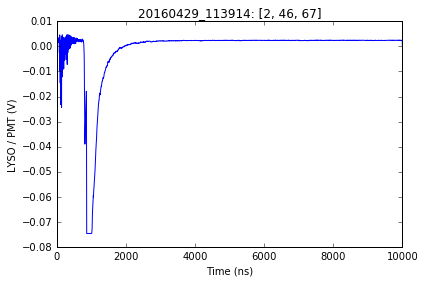

In [24]:
# plot setup
fig, ax = plt.subplots()
y = np.mean(trace, axis=0)
ax.plot(x, y)

# format
ax.set_title(tit)    
#ax.set_xlim([100, 700])
ax.set_xlabel('Time (ns)')  
ax.set_ylabel('LYSO / PMT (V)')  

#output
plt.tight_layout()
fileout = os.path.join(out_dire, str(squid) + "_"+ftype+"_av.png")
plt.savefig(fileout, dpi=300)
plt.show()